# Estudo do tempo de corrida em minutos por km (pace) 📚🏃

> Análise a partir da Maratona de Boston 2023


In [ ]:
#@title Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
#@title Leitura do arquivo

uri = "./boston_marathon_2023.csv"
maratona = pd.read_csv(uri)

## Análise da Estrutura do Dataset 📖

In [ ]:
#@title Verificando duplicações

maratona.duplicated().any()

False

In [ ]:
#@title Renomeando colunas

maratona.columns = ["divisao_faixa", "posicao_geral", "posicao_genero", "posicao_faixa", "nome", "equipe", "numero_peito", "tempo_meia_maratona", "tempo_liquido_maratona", "tempo_bruto_maratona", "genero", "tempo_meia_maratona_segundos", "tempo_liquido_maratona_segundos", "tempo_bruto_maratona_segundos", "tempo_liquido_maratona_minutos"]
maratona.head()

,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos
0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000
1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667
2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000
3,18-39,4,4,4,"Korir, Albert",Team–,19,1H 2M 20S,2H 8M 1S,2H 8M 1S,M,3740.0,7681,7681,128.016667
4,18-39,5,5,5,"Talbi, Zouhair",Team–,31,1H 2M 20S,2H 8M 35S,2H 8M 35S,M,3740.0,7715,7715,128.583333


In [ ]:
#@title Adicionando o 'Pace' à tabela

maratona['pace'] = maratona['tempo_liquido_maratona_minutos'] / 42
maratona.head()

,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos,pace
0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000,2.997619
1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667,3.001587
2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000,3.002381
3,18-39,4,4,4,"Korir, Albert",Team–,19,1H 2M 20S,2H 8M 1S,2H 8M 1S,M,3740.0,7681,7681,128.016667,3.048016
4,18-39,5,5,5,"Talbi, Zouhair",Team–,31,1H 2M 20S,2H 8M 35S,2H 8M 35S,M,3740.0,7715,7715,128.583333,3.061508


In [ ]:
#@title Visualização geral

maratona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   divisao_faixa                    26598 non-null  object 
 1   posicao_geral                    26598 non-null  int64  
 2   posicao_genero                   26598 non-null  int64  
 3   posicao_faixa                    26598 non-null  int64  
 4   nome                             26598 non-null  object 
 5   equipe                           26598 non-null  object 
 6   numero_peito                     26598 non-null  object 
 7   tempo_meia_maratona              26526 non-null  object 
 8   tempo_liquido_maratona           26598 non-null  object 
 9   tempo_bruto_maratona             26598 non-null  object 
 10  genero                           26598 non-null  object 
 11  tempo_meia_maratona_segundos     26526 non-null  float64
 12  tempo_liquido_mara

## Análise do Pace e Gênero 📊

> ### Motivação
- Como o pace difere entre homens e mulheres?
- A densidade do pace é semelhante para ambos os gêneros?
- Como o pace médio varia em diferentes faixas etárias para homens e mulheres?
- Qual é a distribuição percentual de homens e mulheres na maratona?

In [ ]:
#@title Selecionando corredores por gênero

homens = maratona[maratona['genero'] == 'M']
mulheres = maratona[maratona['genero'] == 'W']


In [ ]:
#@title Média do pace
maratona['pace'].mean()

5.298070209360532

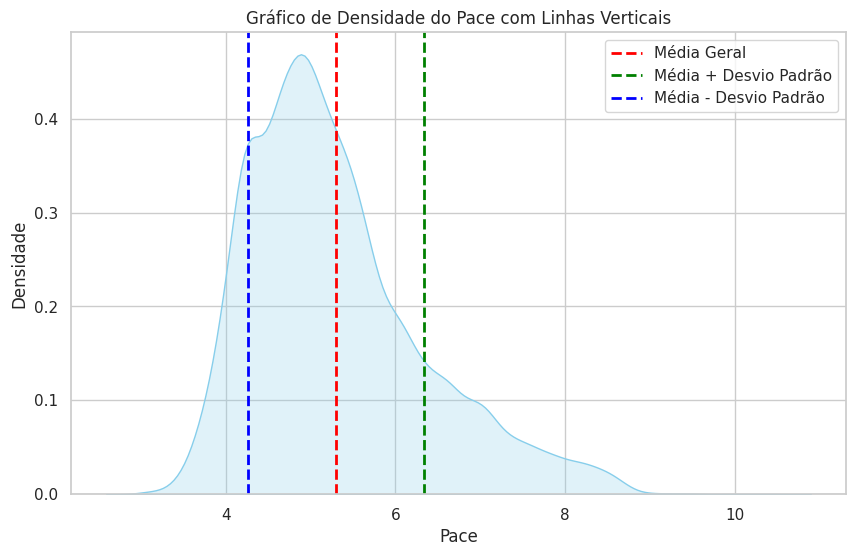

In [94]:
# Configuração inicial
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Gráfico de densidade do pace
sns.kdeplot(maratona['pace'], color='skyblue', fill=True)

# Linha vertical para representar a média
mean_pace = maratona['pace'].mean()
plt.axvline(mean_pace, color='red', linestyle='dashed', linewidth=2, label='Média Geral')

# Linha vertical para representar a média + desvio padrão
std_dev_pace = maratona['pace'].std()
plt.axvline(mean_pace + std_dev_pace, color='green', linestyle='dashed', linewidth=2, label='Média + Desvio Padrão')

# Linha vertical para representar a média - desvio padrão
plt.axvline(mean_pace - std_dev_pace, color='blue', linestyle='dashed', linewidth=2, label='Média - Desvio Padrão')

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Densidade do Pace com Linhas Verticais')
plt.xlabel('Pace')
plt.ylabel('Densidade')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()


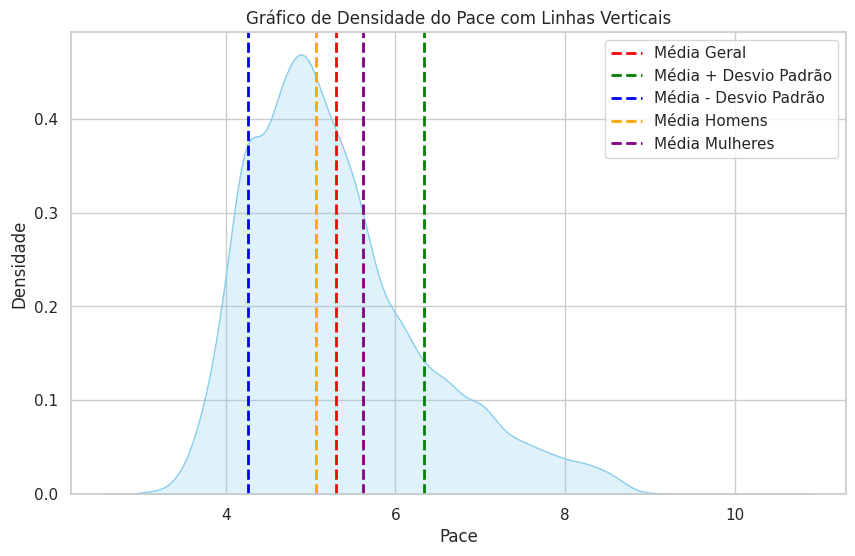

In [96]:
# Configuração inicial
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Gráfico de densidade do pace
sns.kdeplot(maratona['pace'], color='skyblue', fill=True)

# Linha vertical para representar a média geral
mean_pace = maratona['pace'].mean()
plt.axvline(mean_pace, color='red', linestyle='dashed', linewidth=2, label='Média Geral')

# Linha vertical para representar a média + desvio padrão
std_dev_pace = maratona['pace'].std()
plt.axvline(mean_pace + std_dev_pace, color='green', linestyle='dashed', linewidth=2, label='Média + Desvio Padrão')

# Linha vertical para representar a média - desvio padrão
plt.axvline(mean_pace - std_dev_pace, color='blue', linestyle='dashed', linewidth=2, label='Média - Desvio Padrão')

# Calcular média do pace para homens
mean_pace_homens = maratona[maratona['genero'] == 'M']['pace'].mean()
plt.axvline(mean_pace_homens, color='orange', linestyle='dashed', linewidth=2, label='Média Homens')

# Calcular média do pace para mulheres
mean_pace_mulheres = maratona[maratona['genero'] == 'W']['pace'].mean()
plt.axvline(mean_pace_mulheres, color='purple', linestyle='dashed', linewidth=2, label='Média Mulheres')

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Densidade do Pace com Linhas Verticais')
plt.xlabel('Pace')
plt.ylabel('Densidade')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()


In [ ]:
#@title Dados do pace

## para todos
p_geral = maratona['pace'].describe()

## para homens
p_homens = homens['pace'].describe()

## para mulheres
p_mulheres = mulheres['pace'].describe()

print('Para todos\n', p_geral)
print('Para homens\n', p_homens)
print('Para mulheres\n', p_mulheres)


Para todos
 count    26598.000000
mean         5.298070
std          1.041783
min          2.997619
25%          4.549306
50%          5.093452
75%          5.820238
max         10.488492
Name: pace, dtype: float64
Para homens
 count    15175.000000
mean         5.057745
std          1.039410
min          2.997619
25%          4.275198
50%          4.784127
75%          5.565278
max         10.325000
Name: pace, dtype: float64
Para mulheres
 count    11423.000000
mean         5.617333
std          0.955665
min          3.372222
25%          4.944643
50%          5.382143
75%          6.092063
max         10.488492
Name: pace, dtype: float64


In [ ]:
#@title Média do pace por faixa etária

## para todos
mpf_todos = maratona.groupby('divisao_faixa')['pace'].mean().reset_index()

## para homens
mpf_homens = homens.groupby('divisao_faixa')['pace'].mean().reset_index()

## para mulheres
mpf_mulheres = mulheres.groupby('divisao_faixa')['pace'].mean().reset_index()

print('Para todos\n', mpf_todos)
print('Para homens\n', mpf_homens)
print('Para mulheres\n', mpf_mulheres)

Para todos
   divisao_faixa      pace
0         18-39  5.037818
1         40-44  5.134520
2         45-49  5.278441
3         50-54  5.474871
4         55-59  5.652182
5         60-64  5.856056
6         65-69  6.153434
7         70-74  6.557524
8         75-79  7.055347
9           80+  7.169127
Para homens
   divisao_faixa      pace
0         18-39  4.678720
1         40-44  4.833377
2         45-49  5.006103
3         50-54  5.269526
4         55-59  5.435386
5         60-64  5.709755
6         65-69  6.022541
7         70-74  6.432884
8         75-79  7.055151
9           80+  7.092989
Para mulheres
   divisao_faixa      pace
0         18-39  5.426327
1         40-44  5.493871
2         45-49  5.615978
3         50-54  5.823973
4         55-59  6.030443
5         60-64  6.164204
6         65-69  6.478595
7         70-74  6.985721
8         75-79  7.056310
9           80+  7.283333


In [ ]:
#@title Desvio padrão do pace geral

maratona['pace'].std

<bound method NDFrame._add_numeric_operations.<locals>.std of 0        2.997619
1        3.001587
2        3.002381
3        3.048016
4        3.061508
           ...   
26593    7.828571
26594    8.109921
26595    8.166270
26596    7.240476
26597    7.326190
Name: pace, Length: 26598, dtype: float64>

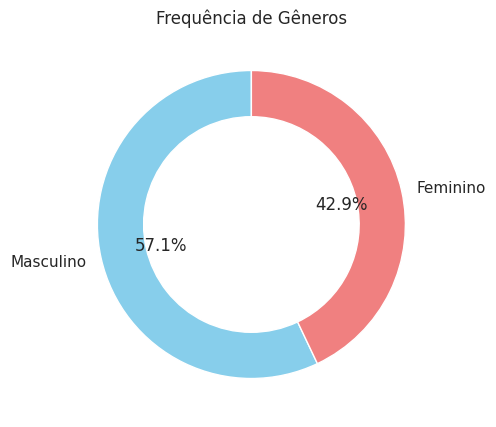

In [ ]:
#@title Frequência de Gêneros
df = maratona['genero'].value_counts()

# Plotar gráfico de pizza
df.plot(kind='pie', autopct='%1.1f%%', labels=['Masculino','Feminino'],  startangle=90, figsize=(5, 5), colors=['skyblue', 'lightcoral'], wedgeprops=dict(width=0.3))

plt.title("Frequência de Gêneros")
plt.ylabel("")  # remove o rótulo do eixo y
plt.show()

<ipython-input-17-4549ed6061fa>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(homens['pace'], shade=True, color='skyblue', label='Homens')
<ipython-input-17-4549ed6061fa>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mulheres['pace'], shade=True, color='lightcoral', label='Mulheres')
<ipython-input-17-4549ed6061fa>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(maratona['pace'], shade=True, color='plum', label='Geral')


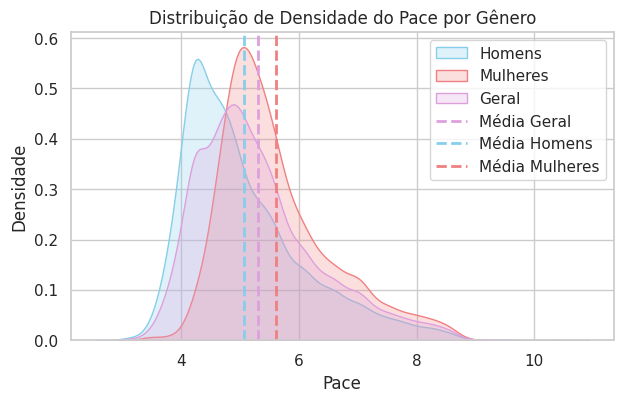

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações adicionais para melhorar a visualização
plt.figure(figsize=(7, 4))
sns.set(style="whitegrid")

# Gráfico de densidade do Pace para homens
sns.kdeplot(homens['pace'], shade=True, color='skyblue', label='Homens')

# Gráfico de densidade do Pace para mulheres
sns.kdeplot(mulheres['pace'], shade=True, color='lightcoral', label='Mulheres')

sns.kdeplot(maratona['pace'], shade=True, color='plum', label='Geral')


# Adiciona linhas verticais para representar as médias
plt.axvline(maratona['pace'].mean(), color='plum', linestyle='dashed', linewidth=2, label='Média Geral')
plt.axvline(homens['pace'].mean(), color='skyblue', linestyle='dashed', linewidth=2, label='Média Homens')
plt.axvline(mulheres['pace'].mean(), color='lightcoral', linestyle='dashed', linewidth=2, label='Média Mulheres')

plt.title('Distribuição de Densidade do Pace por Gênero')
plt.xlabel('Pace')
plt.ylabel('Densidade')

# Adiciona uma legenda
plt.legend()

# Exibe o gráfico
plt.show()


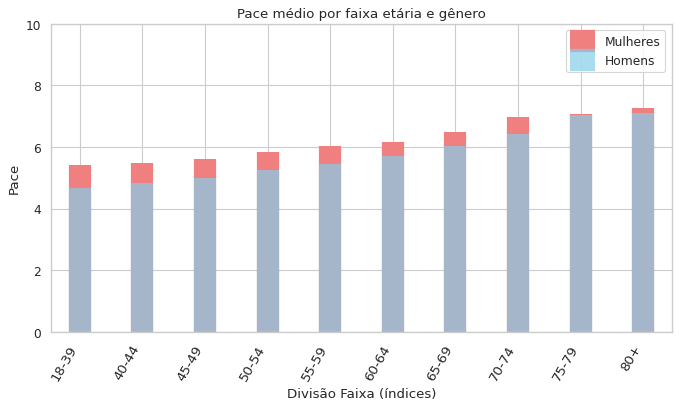

In [ ]:
#@title Pace médio por faixa etária e gênero

##  Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 5), facecolor='white', dpi=80)

# Adicionar as barras verticais representando a média de pace para mulheres e homens
ax.vlines(x=mpf_mulheres.index, ymin=0, ymax=mpf_mulheres['pace'], color='lightcoral', alpha=1, linewidth=20, label='Mulheres')
ax.vlines(x=mpf_homens.index, ymin=0, ymax=mpf_homens['pace'], color='skyblue', alpha=0.7, linewidth=20, label='Homens')

plt.xticks(mpf_homens.index, mpf_homens['divisao_faixa'], rotation=60, horizontalalignment='right', fontsize=12)

ax.set(ylabel='Pace', ylim=(0, 10))
ax.set(xlabel='Divisão Faixa (índices)')

plt.legend()
plt.title('Pace médio por faixa etária e gênero')
plt.show()

## Análise Pace e Equipes de corrida 👩🏻‍🤝‍👩🏻

> ## Motivação
- Qual a equipe mais veloz?
- Ter uma equipe te torna mais veloz?

In [ ]:
#@title Dividindo a população em 2 amostras

sem_equipe = maratona[maratona['equipe'] == 'Team–'].reset_index()
com_equipe = maratona[maratona['equipe'] != 'Team–'].reset_index()

In [ ]:
#@title 1ª Amostra - Corredores com equipe
com_equipe.head(3)

,index,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos,pace
0,9,18-39,10,10,10,"Mcdonald, Matthew",TeamBoston Athletic Association,24,1H 3M 59S,2H 10M 17S,2H 10M 17S,M,3839.0,7817,7817,130.283333,3.101984
1,16,18-39,17,17,17,"Flavin, Jp",TeamHansons-Brooks Distance Project,48,1H 5M 40S,2H 13M 27S,2H 13M 27S,M,3940.0,8007,8007,133.450000,3.177381
2,24,18-39,25,25,25,"Hampton, Jonas",TeamBoston Athletic Association,28,1H 5M 33S,2H 17M 5S,2H 17M 5S,M,3933.0,8225,8225,137.083333,3.263889


In [ ]:
#@title 2ª Amostra - Corredores sem equipe
sem_equipe.head(3)

,index,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos,pace
0,0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000,2.997619
1,1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667,3.001587
2,2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000,3.002381


In [ ]:
#@title Número de equipes
num_equipes = com_equipe['equipe'].nunique()
print('Número de equipes', num_equipes)

Número de equipes 85


In [ ]:
#@title Número de corredores com e sem equipe

## com equipe
nc_com_equipe = com_equipe['nome'].nunique()

## sem equipe
nc_sem_equipe = sem_equipe['nome'].nunique()

print(f'Número de corredores\nCom equipe: {nc_com_equipe}\nSem equipe: {nc_sem_equipe}')

Número de corredores
Com equipe: 1257
Sem equipe: 25092


In [ ]:
#@title Pace médio corredores com e sem equipe
## densidade é o a frequência relativa dividida pela amplitude da classe
mp_com_equipe = com_equipe['pace'].mean()
mp_sem_equipe = sem_equipe['pace'].mean()

print(f'Pace médio\nCom equipe: {mp_com_equipe}\nSem equipe: {mp_sem_equipe}')

Pace médio
Com equipe: 4.8352736139500845
Sem equipe: 5.321045667806716


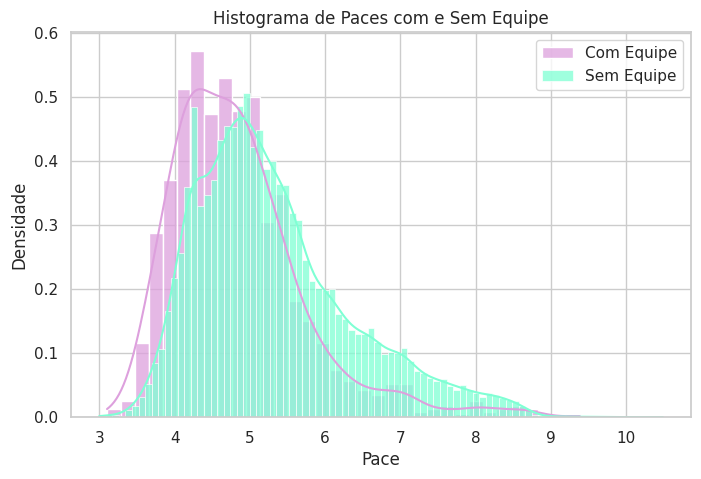

In [ ]:
#@title Histograma de paces com e sem equipe

# Histograma de paces com e sem equipe
plt.figure(figsize=(8, 5))

# Normalizar os histogramas
sns.histplot(com_equipe['pace'], color='plum', alpha=0.75, label='Com Equipe', kde=True, stat='density')
sns.histplot(sem_equipe['pace'], color='aquamarine', alpha=0.75, label='Sem Equipe', kde=True, stat='density')

plt.xlabel('Pace')
plt.ylabel('Densidade')
plt.title("Histograma de Paces com e Sem Equipe")
plt.legend()
plt.show()


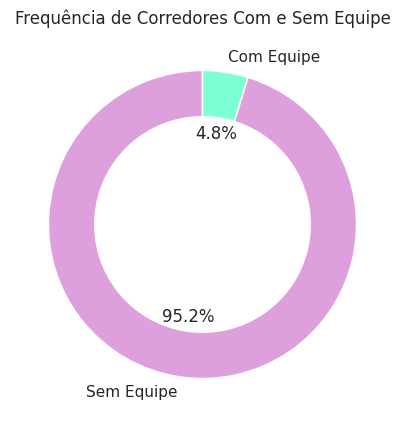

In [ ]:
#@title Frequência de corredores com e sem equipe


df_frequencia = pd.DataFrame({'Frequência': [nc_sem_equipe, nc_com_equipe]},
                             index=['Sem Equipe', 'Com Equipe'])

df_frequencia['Frequência'].plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(5, 5),
                                labels=df_frequencia.index, colors=['plum', 'aquamarine'], wedgeprops=dict(width=0.3))

plt.title("Frequência de Corredores Com e Sem Equipe")
plt.ylabel("")
plt.show()

In [ ]:
#@title Média do pace por equipe
mp_equipes = maratona.groupby('equipe')['pace'].mean().reset_index()
print(mp_equipes)

                                     equipe      pace
0                      TeamAl-limite Mexico  4.806587
1                  TeamAnn Arbor Track Club  4.119048
2                      TeamBEN Running Club  4.726401
3                TeamBakersfield Greyhounds  4.803968
4                TeamBattle Road Track Club  4.188889
..                                      ...       ...
81         TeamWinner's Circle Running Club  5.509776
82                TeamWolfpack Running Club  4.406746
83  TeamYellowstone Valley Distance Project  4.637302
84               Teamsan Luis Distance Club  5.770679
85                                    Team–  5.321046

[86 rows x 2 columns]


In [ ]:
#@title Equipe com maior e menor pace

com_equipe.describe()


,index,posicao_geral,posicao_genero,posicao_faixa,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos,pace
count,1258.000000,1258.000000,1258.000000,1258.000000,1253.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,12618.743243,9593.154213,4749.285374,902.655803,5911.505986,12184.889507,12331.826709,203.081492,4.835274
std,8028.434045,7226.264841,3766.007552,936.151501,1012.184077,2257.207586,2316.980663,37.620126,0.895717
min,9.000000,10.000000,10.000000,1.000000,3839.000000,7817.000000,7817.000000,130.283333,3.101984
25%,5786.500000,3237.500000,1374.500000,207.250000,5244.000000,10629.500000,10742.750000,177.158333,4.218056
50%,12842.500000,8316.500000,3957.000000,589.500000,5783.000000,11824.000000,11982.500000,197.066667,4.692063
75%,20084.000000,14964.500000,7533.000000,1310.500000,6392.000000,13203.000000,13461.250000,220.050000,5.239286
max,26584.000000,26615.000000,15170.000000,5250.000000,10959.000000,23655.000000,23972.000000,394.250000,9.386905


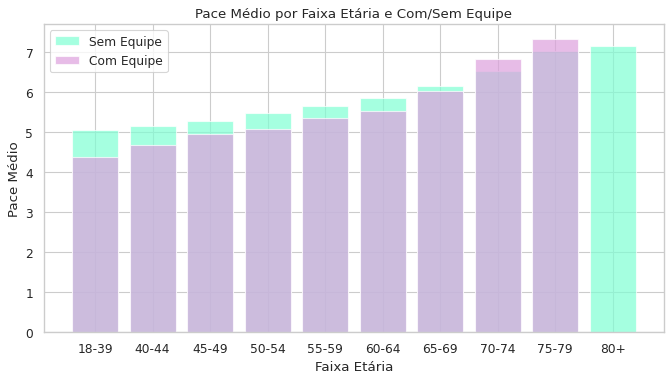

In [ ]:
#@title Pace médio por faixa etária com/sem equipe
fig, ax = plt.subplots(figsize=(10, 5), facecolor='white', dpi=80)

ax.bar(mp_sem_equipe.index, mp_sem_equipe, color='aquamarine', alpha=0.7, label='Sem Equipe')
ax.bar(mp_com_equipe.index, mp_com_equipe, color='plum', alpha=0.7, label='Com Equipe')

plt.title('Pace Médio por Faixa Etária e Com/Sem Equipe')
plt.xlabel('Faixa Etária')
plt.ylabel('Pace Médio')
plt.legend()
plt.show()


In [90]:
#@title Equipe mais veloz
com_equipe.min()

<ipython-input-90-dfa7973e2d69>:2: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  com_equipe.min()


index                                                 9
divisao_faixa                                     18-39
posicao_geral                                        10
posicao_genero                                       10
posicao_faixa                                         1
nome                                       Abela, Kathy
equipe                             TeamAl-limite Mexico
numero_peito                                      10005
tempo_liquido_maratona                       2H 10M 17S
tempo_bruto_maratona                         2H 10M 17S
genero                                                M
tempo_meia_maratona_segundos                     3839.0
tempo_liquido_maratona_segundos                    7817
tempo_bruto_maratona_segundos                      7817
tempo_liquido_maratona_minutos               130.283333
pace                                           3.101984
dtype: object

In [89]:
#@title Equipes com maior número de corredores

com_equipe['equipe'].value_counts().head()


TeamTracksmith Boston Hares        46
TeamMisty Mountain Runners         43
TeamCharlotte Running Club         42
TeamBoston Athletic Association    41
TeamSan Diego Track Club           40
Name: equipe, dtype: int64